In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
color = sns.color_palette()
import plotly.graph_objects as go

%matplotlib inline

In [2]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_cases = pd.read_csv(confirmed_cases)
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,751,752
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,36,36
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,24,24,24,25,25,25,25,25,25,25
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,1867,1932,2066,2148,2273,2386,2507,2619,2782,2884
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,106,106,106,106,106,106,107,107,107,107
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3016,3016,3025,3030,3035,3033,3035,3042,3044,3047


In [3]:
confirmed_cases.shape

(266, 111)

In [4]:
confirmed_deaths ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
confirmed_deaths = pd.read_csv(confirmed_deaths)
confirmed_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,58,60,64,68,72,85,90,95,104,106
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,30,30,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,437,444,450,453,459,463,465,470,476,483
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,41,42,42,43,44,45,45,46,46,47
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,207,214,218,225,237,246,260,264,273,282
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,30,30,32,33,33,35,39,40,40,42
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,39,40,41,41,42,42,43,44,44,44


In [5]:
confirmed_deaths.shape

(266, 111)

In [6]:
confirmed_recovered ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
confirmed_recovered = pd.read_csv(confirmed_recovered)
confirmed_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,228,252,260,310,331,345,397,421,458,468
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,431,455,470,488,519,531,543,570,595,605
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,398,423,468,468,472,493,499,514,521,526
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,6,7,7,11,11,11,11,11,11,11
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,11,11,11,15,15,15,15,16,16,16
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1162,1192,1256,1292,1320,1354,1442,1472,1524,1601
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,866,900,929,977,1010,1035,1071,1111,1135,1185
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,101,101,103,103,103,103,103,103,103,103
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,2266,2284,2293,2293,2306,2328,2349,2418,2463,2486


In [7]:
confirmed_recovered.shape

(252, 111)

In [8]:
df_confirmed = confirmed_cases.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed_Cases')
df_confirmed

,Province/State,Country/Region,Lat,Long,Date,Confirmed_Cases
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0


In [9]:
df_confirmed.shape

(28462, 6)

In [10]:
df_deaths = confirmed_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Death_Cases')
df_deaths

,Province/State,Country/Region,Lat,Long,Date,Death_Cases
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0


In [11]:
df_deaths.shape

(28462, 6)

In [12]:
df_recovered = confirmed_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered_Cases')
df_recovered

,Province/State,Country/Region,Lat,Long,Date,Recovered_Cases
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0


In [13]:
df_recovered.shape

(26964, 6)

In [14]:
df = pd.concat([df_confirmed, df_deaths['Death_Cases'], df_recovered['Recovered_Cases']], axis=1)
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'Confirmed_Cases', 'Death_Cases', 'Recovered_Cases'],
      dtype='object')

In [15]:
df = df.rename(columns={'Province/State': 'Province_State', 'Country/Region': 'Country_Region'})
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed_Cases,Death_Cases,Recovered_Cases
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


In [16]:
df.isnull().sum().sort_values(ascending=False)


Province_State     19688
Recovered_Cases     1498
Death_Cases            0
Confirmed_Cases        0
Date                   0
Long                   0
Lat                    0
Country_Region         0
dtype: int64

In [17]:
df.describe()

,Lat,Long,Confirmed_Cases,Death_Cases,Recovered_Cases
count,28462.000000,28462.000000,2.846200e+04,28462.000000,26964.00000
mean,21.259359,22.432499,3.470336e+03,228.630876,1022.56301
std,24.701814,70.347540,3.273996e+04,2271.025763,7684.82362
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.00000
25%,6.877000,-19.020800,0.000000e+00,0.000000,0.00000
50%,23.488100,20.921188,1.100000e+01,0.000000,0.00000
75%,41.153300,78.000000,2.850000e+02,3.000000,71.00000
max,71.706900,178.065000,1.257023e+06,75662.000000,195036.00000


In [18]:
df.shape

(28462, 8)

In [19]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed_Cases', 'Death_Cases', 'Recovered_Cases'],
      dtype='object')

In [20]:
df.dtypes

Province_State      object
Country_Region      object
Lat                float64
Long               float64
Date                object
Confirmed_Cases      int64
Death_Cases          int64
Recovered_Cases    float64
dtype: object

In [21]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed_Cases,Death_Cases,Recovered_Cases
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


In [22]:
?WordCloud

In [23]:
df['Country_Region'].replace(' ', '_', regex=True)


0                   Afghanistan
1                       Albania
2                       Algeria
3                       Andorra
4                        Angola
5           Antigua_and_Barbuda
6                     Argentina
7                       Armenia
8                     Australia
9                     Australia
10                    Australia
11                    Australia
12                    Australia
13                    Australia
14                    Australia
15                    Australia
16                      Austria
17                   Azerbaijan
18                      Bahamas
19                      Bahrain
20                   Bangladesh
21                     Barbados
22                      Belarus
23                      Belgium
24                        Benin
25                       Bhutan
26                      Bolivia
27       Bosnia_and_Herzegovina
28                       Brazil
29                       Brunei
                  ...          
28432   

In [24]:
df['Country_Region'].nunique()

187

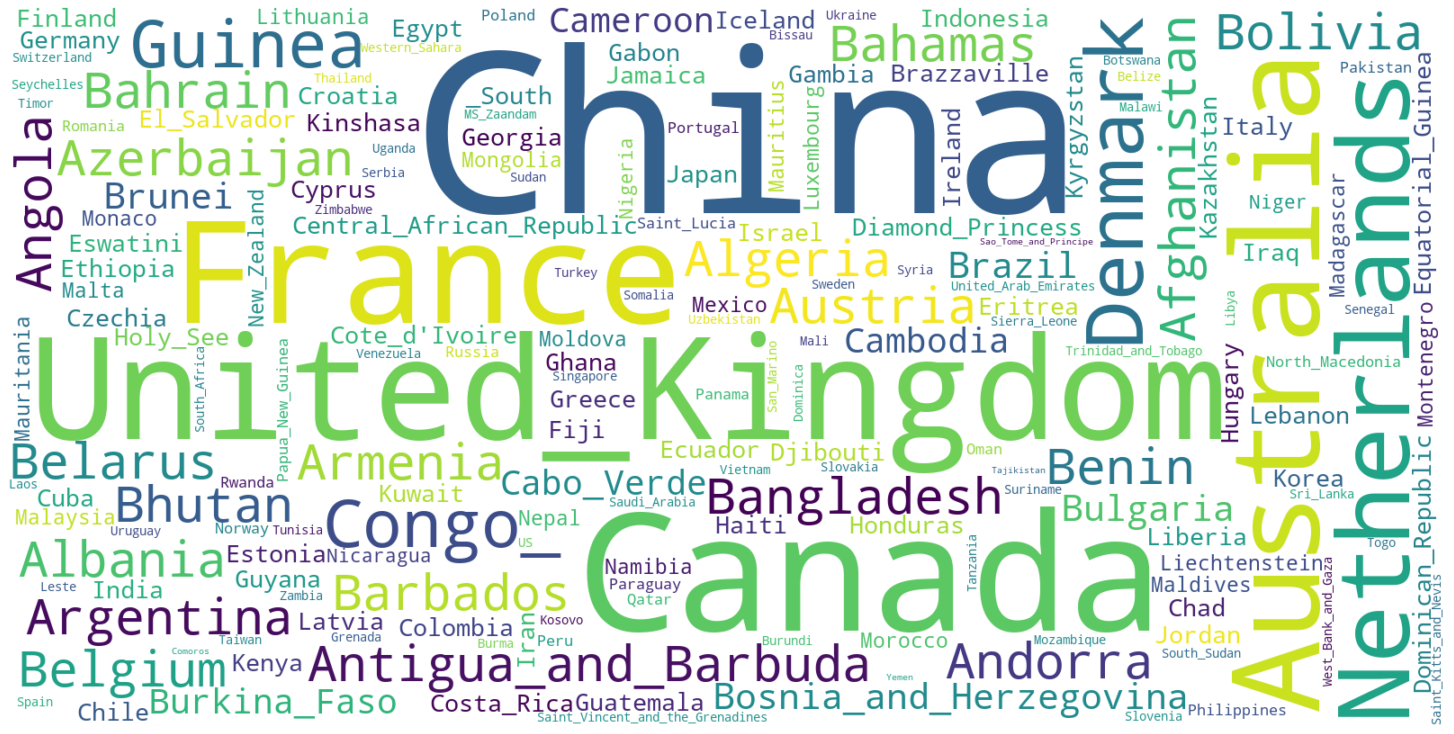

<Figure size 432x288 with 0 Axes>

In [25]:

wc = WordCloud(max_font_size=250,collocations=False, 
                       max_words=1000,width=1600, 
               height=800,background_color="white").generate(' '.join(df['Country_Region'].replace(' ', '_', regex=True)))
plt.figure( figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('Country_Cloud.png')

In [26]:
df

,Province_State,Country_Region,Lat,Long,Date,Confirmed_Cases,Death_Cases,Recovered_Cases
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0,0,0.0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0,0,0.0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0,0,0.0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0,0,0.0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0,0,0.0
